In [1]:
# %%
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from tqdm import tqdm

In [2]:
def compute_iou(box1, box2):
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

def process_boxes(boxes, iou_threshold=0.85):
    processed_boxes = []
    used = [False] * len(boxes)
    for i, box1 in enumerate(boxes):
        if used[i]:
            continue
        x1, y1, x2, y2 = box1.xyxy[0].cpu().numpy()
        conf1 = box1.conf[0].item()
        cls1 = int(box1.cls[0].item())
        best_box = (x1, y1, x2, y2, conf1, cls1)

        for j, box2 in enumerate(boxes):
            if i == j or used[j]:
                continue
            x1_b, y1_b, x2_b, y2_b = box2.xyxy[0].cpu().numpy()
            conf2 = box2.conf[0].item()
            cls2 = int(box2.cls[0].item())

            iou = compute_iou((x1, y1, x2, y2), (x1_b, y1_b, x2_b, y2_b))
            if iou > iou_threshold:
                if conf2 > best_box[4]:
                    best_box = (x1_b, y1_b, x2_b, y2_b, conf2, cls2)
                used[j] = True

        processed_boxes.append(best_box)
        used[i] = True

    return processed_boxes

In [3]:
index = 11
image_origin = np.load("data/data0.npy")[index]
img_temp = Image.fromarray(image_origin)
image_path = "./temp.jpg"
img_temp.save(image_path)
model = YOLO("./custom_results/train/weights/best.pt")
result = model.predict(source=image_path)


image 1/1 c:\Users\deban\Desktop\sem 6\MLNS\deep-learning-assignment-Debangan-MishraIIIT\Part_2\temp.jpg: 160x640 1 1, 1 2, 2 4s, 121.6ms
Speed: 0.0ms preprocess, 121.6ms inference, 337.0ms postprocess per image at shape (1, 3, 160, 640)



image 1/1 c:\Users\deban\Desktop\sem 6\MLNS\deep-learning-assignment-Debangan-MishraIIIT\Part_2\temp.jpg: 160x640 1 1, 1 2, 2 4s, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 3.2ms postprocess per image at shape (1, 3, 160, 640)


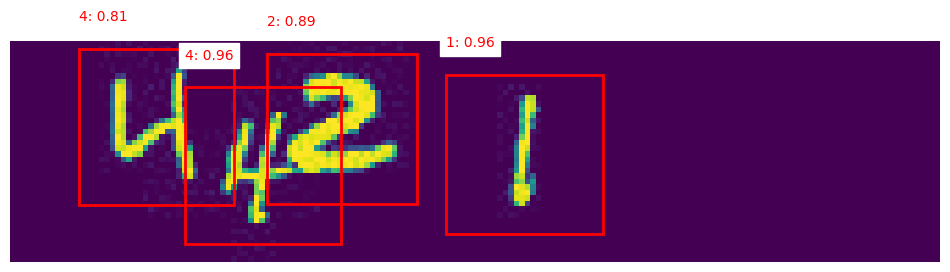

In [4]:
result = model.predict(source=image_path)
plt.figure(figsize=(12, 8))
img = Image.open(image_path)
plt.imshow(img)
os.remove(image_path)

boxes = result[0].boxes
class_names = model.names
processed_boxes = process_boxes(boxes, iou_threshold=0.65)

for box in processed_boxes:
    x1, y1, x2, y2, conf, cls_id = box
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1,
                        fill=False,
                        linewidth=2,
                        edgecolor='red')
    plt.gca().add_patch(rect)
    label = f'{class_names[cls_id]}: {conf:.2f}'
    plt.text(x1, y1-5, label,
             color='red',
             fontsize=10,
             backgroundcolor='white')

plt.axis('off')
plt.show()

In [5]:
sum = 0
for i, box in enumerate(processed_boxes):
    sum+= box[-1]
print(f"Predicted: {sum}")
image_target = np.load("data/lab0.npy")[index]
print(f"Real: {image_target}")

Predicted: 11
Real: 11


### Final Inference on the Given Data

In [6]:
model = YOLO("./custom_results/train/weights/best.pt")

In [7]:
train_data1 = np.load('./data/data0.npy')
train_data2 = np.load('./data/data1.npy')
train_data3 = np.load('./data/data2.npy')
train_label1 = np.load('./data/lab0.npy')
train_label2 = np.load('./data/lab1.npy')
train_label3 = np.load('./data/lab2.npy')

full_data = np.concatenate([train_data1, train_data2, train_data3])
full_label = np.concatenate([train_label1, train_label2, train_label3])

In [8]:
correct_count = 0
for i, (x, y) in enumerate(zip(full_data, full_label)):
    print(i)
    image_origin = x
    img_temp = Image.fromarray(image_origin)
    image_path = "./temp.jpg"
    img_temp.save(image_path)

    result = model.predict(source=image_path)
    os.remove(image_path)

    boxes = result[0].boxes
    class_names = model.names

    sum = 0
    for _, box in enumerate(boxes):
        sum+= int(box.cls[0]) #box[-1]

    if sum==y:
        correct_count+=1

    if ((i+1)%100)==0:
        with open("./checkpoints.txt", "a") as f:
            f.write(f"Epoch: {i+1}, Accuracy: {correct_count/(i+1)}\n")

0

image 1/1 c:\Users\deban\Desktop\sem 6\MLNS\deep-learning-assignment-Debangan-MishraIIIT\Part_2\temp.jpg: 160x640 1 1, 1 6, 2 9s, 10.2ms
Speed: 0.0ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 160, 640)
1

image 1/1 c:\Users\deban\Desktop\sem 6\MLNS\deep-learning-assignment-Debangan-MishraIIIT\Part_2\temp.jpg: 160x640 1 0, 1 4, 1 6, 1 8, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 640)
2

image 1/1 c:\Users\deban\Desktop\sem 6\MLNS\deep-learning-assignment-Debangan-MishraIIIT\Part_2\temp.jpg: 160x640 1 3, 1 4, 1 5, 1 9, 4.3ms
Speed: 1.0ms preprocess, 4.3ms inference, 0.0ms postprocess per image at shape (1, 3, 160, 640)
3

image 1/1 c:\Users\deban\Desktop\sem 6\MLNS\deep-learning-assignment-Debangan-MishraIIIT\Part_2\temp.jpg: 160x640 1 2, 2 7s, 1 9, 3.9ms
Speed: 0.9ms preprocess, 3.9ms inference, 4.5ms postprocess per image at shape (1, 3, 160, 640)
4

image 1/1 c:\Users\deban\Desktop\sem 6\MLNS\dee

In [1]:
accuracy = correct_count/len(full_data)
print(f"Accuracy on Input Data: {accuracy}")

NameError: name 'correct_count' is not defined